In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

df = pd.read_pickle("new_ak5.pkl")

In [2]:
df['jes_truth'] = df.apply(lambda row: row['jet_pt']/row['gen_pt'] if row['jet_gen_dr']<0.25 else -1.,axis=1)

In [3]:
exclude=['ak5pfcand_eta','ak5pfcand_pt','ak5pfcand_phi','ak5pfcand_charge','ak5pfcand_id','jet_image','photon_filter','electron_filter','muon_filter','charHad_filter','neutHad_filter','jet_charHad_frac_bins']
for c in df.columns:
    if c in exclude : continue
    df[c+"_weighted"] = np.multiply(df[c],df["mcweight"])
    df[c+"_weighted_squared"] = np.power(df[c+"_weighted"],2)

In [4]:
print df.columns
df.head()

Index([u'event', u'run', u'lumi', u'ak5pfcand_ijet', u'ak5pfcand_eta',
       u'ak5pfcand_phi', u'ak5pfcand_pt', u'ak5pfcand_charge', u'ak5pfcand_id',
       u'met',
       ...
       u'jet_electron_frac_weighted', u'jet_electron_frac_weighted_squared',
       u'jet_muon_frac_weighted', u'jet_muon_frac_weighted_squared',
       u'jet_charHad_frac_weighted', u'jet_charHad_frac_weighted_squared',
       u'jet_neutHad_frac_weighted', u'jet_neutHad_frac_weighted_squared',
       u'jes_truth_weighted', u'jes_truth_weighted_squared'],
      dtype='object', length=158)


,event,run,lumi,ak5pfcand_ijet,ak5pfcand_eta,ak5pfcand_phi,ak5pfcand_pt,ak5pfcand_charge,ak5pfcand_id,met,...,jet_electron_frac_weighted,jet_electron_frac_weighted_squared,jet_muon_frac_weighted,jet_muon_frac_weighted_squared,jet_charHad_frac_weighted,jet_charHad_frac_weighted_squared,jet_neutHad_frac_weighted,jet_neutHad_frac_weighted_squared,jes_truth_weighted,jes_truth_weighted_squared
0,1,1,1,0,"[0.21452178061, 0.216439172626, 0.231952786446...","[2.48508191109, 2.48497080803, 2.49175453186, ...","[169.566833496, 88.5687332153, 21.9073181152, ...","[0, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1...","[22, 211, 211, 211, 211, 211, 211, 211, 211, 2...",21.15941,...,0.0,0.0,0.0,0.0,683.131562,466668.731213,10.992833,120.842384,1231.944456,1.517687e+06
1,1,1,1,1,"[0.28475934267, 0.281884253025, 0.300727695227...","[-0.173191145062, -0.153716906905, -0.09728183...","[40.4561271667, 30.6164569855, 23.1051216125, ...","[0, 1, -1, -1, 0, 1, -1, 1, -1, -1, 1, 1, 1, 0...","[22, 211, 211, 211, 22, 211, 211, 211, 211, 21...",21.15941,...,0.0,0.0,0.0,0.0,748.883002,560825.751335,70.336758,4947.259589,1149.603583,1.321588e+06
2,1,1,1,2,"[0.55104893446, 0.603416383266, 0.595636427402...","[-2.09328937531, -2.0757291317, -2.10114955902...","[25.6271953583, 22.8461170197, 18.9573955536, ...","[-1, 1, 0, -1, -1, 1, 0, 1, 1, 1, 0, -1, 0, 0,...","[211, 211, 22, 211, 211, 211, 22, 211, 211, 21...",21.15941,...,0.0,0.0,0.0,0.0,778.461645,606002.533448,60.123364,3614.818899,1081.828212,1.170352e+06
3,1,1,1,3,"[0.700357437134, 0.707363724709, 0.76392394304...","[0.136070117354, 0.16965213418, 0.043951325118...","[39.0825195312, 23.3729381561, 18.0224075317, ...","[-1, 0, 0, 1, -1, 0, 1, 1, -1, 1, -1, 1, 0, 0,...","[211, 22, 130, 211, 211, 22, 211, 211, 211, 21...",21.15941,...,0.0,0.0,0.0,0.0,735.556735,541043.711125,136.985508,18765.029377,1126.501869,1.269006e+06
4,1,1,1,4,"[0.895892322063, 0.893017947674, 0.85131764411...","[1.02769947052, 1.03400921822, 1.23598849773, ...","[12.5489063263, 11.0404090881, 9.59162902832, ...","[0, 1, 1, 0, -1, -1, 0, 0, -1, 1, 1, 0, -1, 0,...","[22, 211, 211, 22, 211, 211, 22, 22, 211, 211,...",21.15941,...,0.0,0.0,0.0,0.0,686.473347,471245.656698,16.956925,287.537292,1117.394846,1.248571e+06


In [5]:
print len(df)
df = df.loc[(df['jes_truth']>0.)&(df['jes_truth']<2.)&(abs(df['jet_eta'])<1.3)&(df['ak5pfcand_ijet']<2)]
print len(df)

241241
71623


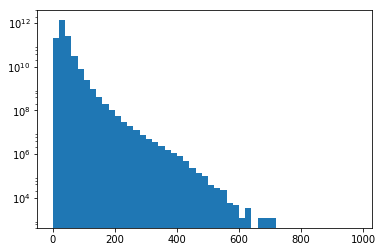

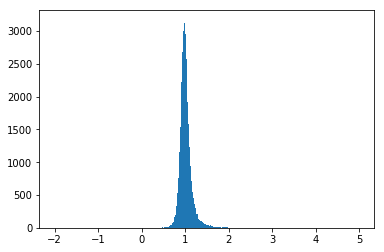

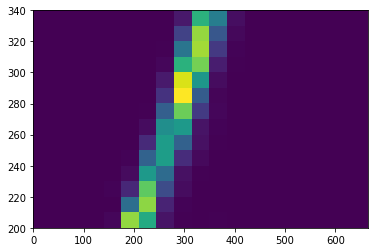

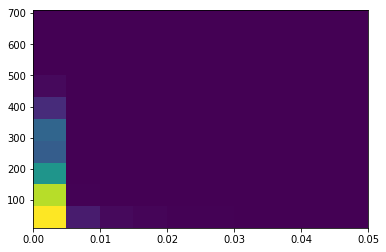

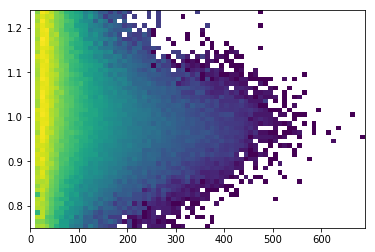

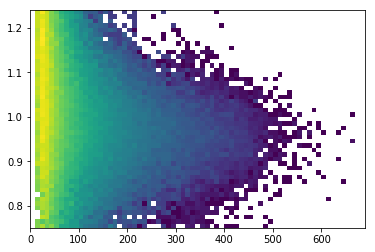

In [6]:
plt.hist(df['jet_pt'],weights=df['mcweight'],bins=np.arange(0,1000,20))
plt.yscale("log")
plt.show()
plt.hist(df['jes_truth'],bins=np.arange(-2,5,0.01))
plt.show()
plt.hist2d(df['gen_pt'],df['jet_pt'],bins=[np.arange(0,700,35),np.arange(200,350,10)])
plt.show()
plt.hist2d(df['jet_gen_dr'],df['jet_pt'])#,bins=[np.arange(0,700,35),np.arange(200,350,10)])
plt.show()
plt.hist2d(df['jet_pt'],df['jes_truth'],weights=df['mcweight'],bins=[np.arange(0,700,10),np.arange(0.75,1.25,0.01)],norm=LogNorm())
plt.show()
plt.hist2d(df['gen_pt'],df['jes_truth'],weights=df['mcweight'],bins=[np.arange(0,700,10),np.arange(0.75,1.25,0.01)],norm=LogNorm())
plt.show()

In [9]:
def jes_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df[indep_var+'_bins'] = pd.cut(df[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    df[dep_var+'_squared'] = np.power(df[dep_var],2)
    grouped = df.groupby([indep_var+'_bins'])
    #means = grouped.mean()[dep_var].values
    sums = grouped.sum()
    #print "means",sums[dep_var+'_weighted']
    #print "sums",sums['mcweight']
    means = sums[dep_var+'_weighted']/sums['mcweight']
    errs = map(lambda x : 1./np.sqrt(x),sums[dep_var+'_squared'])
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<jes>")
    plt.ylim(0.8,1.5)

plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


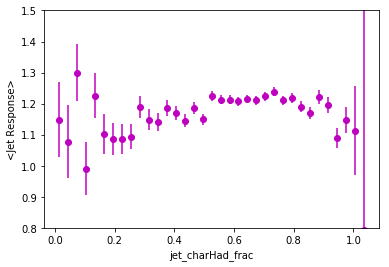

plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


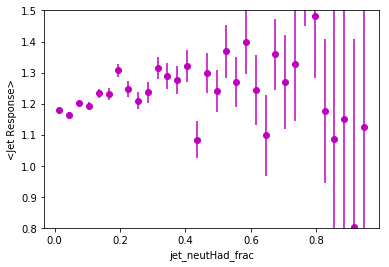

plot_var: gen_pt
low_bin: 0
high_bin: 1000
nbins: 90


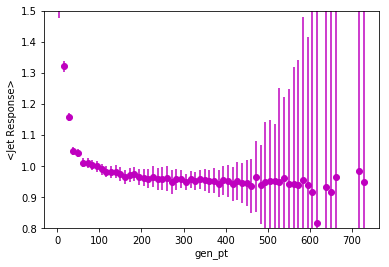

plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50


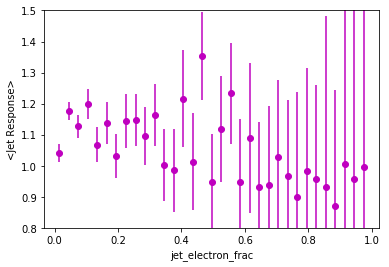

plot_var: jet_pt
low_bin: 0
high_bin: 1000
nbins: 90


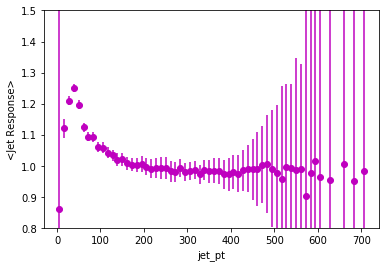

plot_var: jet_electron_mult
low_bin: -0.5
high_bin: 100.5
nbins: 101


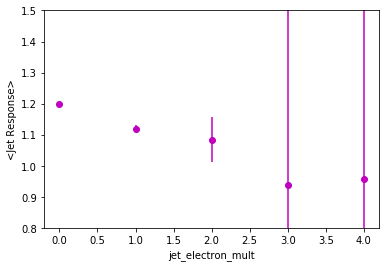

plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


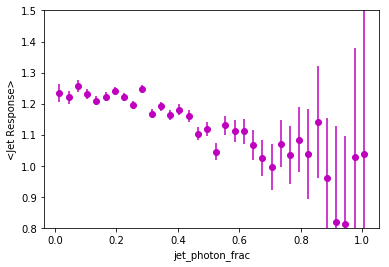

plot_var: jet_neutHad_mult
low_bin: -0.5
high_bin: 100.5
nbins: 101


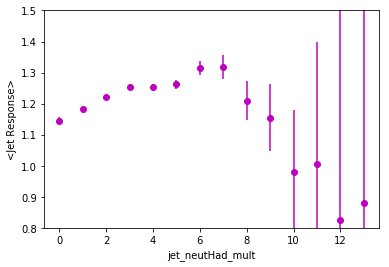

plot_var: jet_eta
low_bin: -3
high_bin: 3
nbins: 60


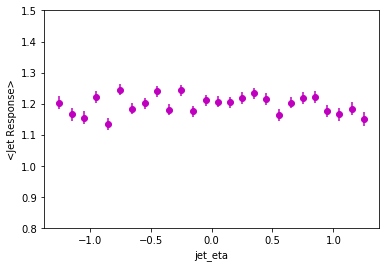

plot_var: jet_charHad_mult
low_bin: -0.5
high_bin: 100.5
nbins: 101


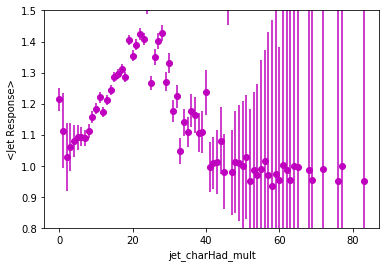

plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


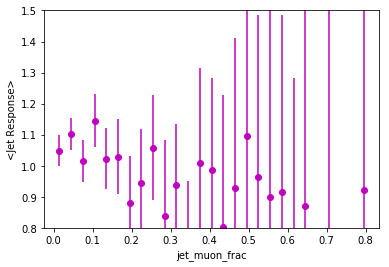

plot_var: jet_muon_mult
low_bin: -0.5
high_bin: 100.5
nbins: 101


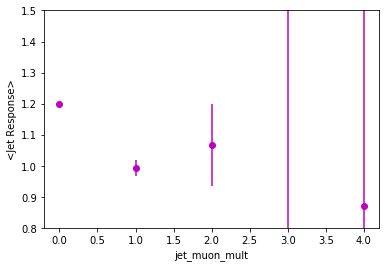

plot_var: jet_photon_mult
low_bin: -0.5
high_bin: 100.5
nbins: 101


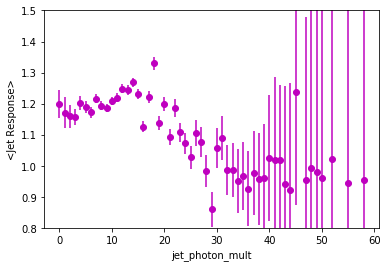

In [10]:
var_binning = { 'gen_pt':(0,1000,90),
                'jet_pt':(0,1000,90),
                'jet_eta':(-3,3,60),
                'jet_photon_frac':(0,1.5,50),
                'jet_neutHad_frac':(0,1.5,50),
                'jet_charHad_frac':(0,1.5,50),
                'jet_muon_frac':(0,1.5,50),
                'jet_electron_frac':(0,1.5,50),
                'jet_photon_mult':(-0.5,100.5,101),
                'jet_neutHad_mult':(-0.5,100.5,101),
                'jet_charHad_mult':(-0.5,100.5,101),
                'jet_muon_mult':(-0.5,100.5,101),
                'jet_electron_mult':(-0.5,100.5,101)
              }
for v in var_binning:
    jes_profile(v,'jes_truth','m',*var_binning[v])
    plt.xlabel(v)
    plt.ylabel('<Jet Response>')
    plt.show()